<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figures:-Simple" data-toc-modified-id="Figures:-Simple-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figures: Simple</a></span></li><li><span><a href="#Figure-for-SI" data-toc-modified-id="Figure-for-SI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure for SI</a></span></li><li><span><a href="#simple-checks" data-toc-modified-id="simple-checks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>simple checks</a></span></li></ul></div>

In [1]:
import MDAnalysis as mda
import mdtraj as md
from MDAnalysis.analysis.distances import distance_array
#import pyprind

#from MDAnalysis.lib.log import ProgressMeter
from MDAnalysis.analysis.base import AnalysisBase

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

/uni-mainz.de/homes/kugaurav/miniconda3/envs/myenv/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
ls

al_contacts_mut16-rde2.pdf         Contact_matrix.npy*
all_contacts_mut16-rde2.png        dynamics_skip10.xtc*
Amino_acid_contact_map2D.png       intial_equil.pdb*
Amino_acid_contact_map.pdf         Martini3_CALVADOS_comparison_mut16.png
Combined_mut16_rbr_rde-2.pdf       Martini3_CALVADOS_comparison.png
Combined_mut16_rbr_rde-2.png       Martini3_CALVADOS_comparison_rde2.png
Combined_mut16_rde-2_plot.pdf      Resdiue_type_2D.png
Combined_mut16_rde-2_plot.png      Resdiue_type_2D_unnormalized.png
Contact_Map_all_atom-fin1.ipynb*   residue_type_1D.png
Contact_Map_all_atom-fin1.py*      sum_any-contact-residues_contacts_mut16.pdf
Contact_matrix_Mut16_RBR_Rde2.npy  sum_any-contact-residues_contacts_mut16.png


In [3]:
contact_matrix = np.load("Contact_matrix.npy")

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
correct_matrix = np.rot90(np.flip(contact_matrix,axis=1))

In [6]:
u = mda.Universe("intial_equil.pdb","dynamics_skip10.xtc")

 

mut16_res = list(u.residues)

 

mut16_resname = []
rde2_resname = []

 

for residue in mut16_res[:140]:
    mut16_resname.append(residue.resname)

for residue in mut16_res[14000:14051]:
    rde2_resname.append(residue.resname)

print (mut16_resname)
print (rde2_resname)

['VAL', 'PRO', 'PRO', 'GLU', 'ASN', 'PRO', 'ALA', 'PRO', 'LEU', 'ARG', 'GLU', 'VAL', 'GLY', 'ASN', 'PHE', 'TYR', 'SER', 'LYS', 'SER', 'ASN', 'HIS', 'ASP', 'GLU', 'ASP', 'ARG', 'ARG', 'ASN', 'VAL', 'GLN', 'LEU', 'PRO', 'PHE', 'THR', 'PRO', 'ALA', 'ASP', 'THR', 'HIS', 'LYS', 'PRO', 'ILE', 'LYS', 'VAL', 'ALA', 'PRO', 'LYS', 'GLU', 'PRO', 'VAL', 'ARG', 'ASN', 'PRO', 'LEU', 'LEU', 'LYS', 'GLU', 'ARG', 'PRO', 'SER', 'ALA', 'ASN', 'GLY', 'PHE', 'ILE', 'ASN', 'ARG', 'ARG', 'LEU', 'PRO', 'SER', 'HIS', 'PRO', 'ALA', 'PRO', 'PRO', 'PRO', 'VAL', 'ASN', 'GLN', 'SER', 'GLN', 'PRO', 'ALA', 'ASN', 'GLN', 'PRO', 'MET', 'GLN', 'THR', 'ALA', 'VAL', 'TYR', 'GLN', 'ASN', 'SER', 'HIS', 'PRO', 'GLY', 'ALA', 'PRO', 'TYR', 'ILE', 'PRO', 'GLN', 'GLN', 'PRO', 'THR', 'TYR', 'GLN', 'PRO', 'GLN', 'LEU', 'PRO', 'VAL', 'GLN', 'GLN', 'PRO', 'GLN', 'PRO', 'HIS', 'GLN', 'TYR', 'ALA', 'PRO', 'GLN', 'PRO', 'ILE', 'HIS', 'HIS', 'GLN', 'GLN', 'PRO', 'ILE', 'HIS', 'GLN', 'PRO', 'MET', 'HIS', 'GLY', 'GLN']
['MET', 'HIS', 'ASN

/uni-mainz.de/homes/kugaurav/miniconda3/envs/myenv/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


In [7]:
mut16_rde2_matrix = np.divide(correct_matrix, 1.3076923076923077)

 

print (np.max(mut16_rde2_matrix))

1.0


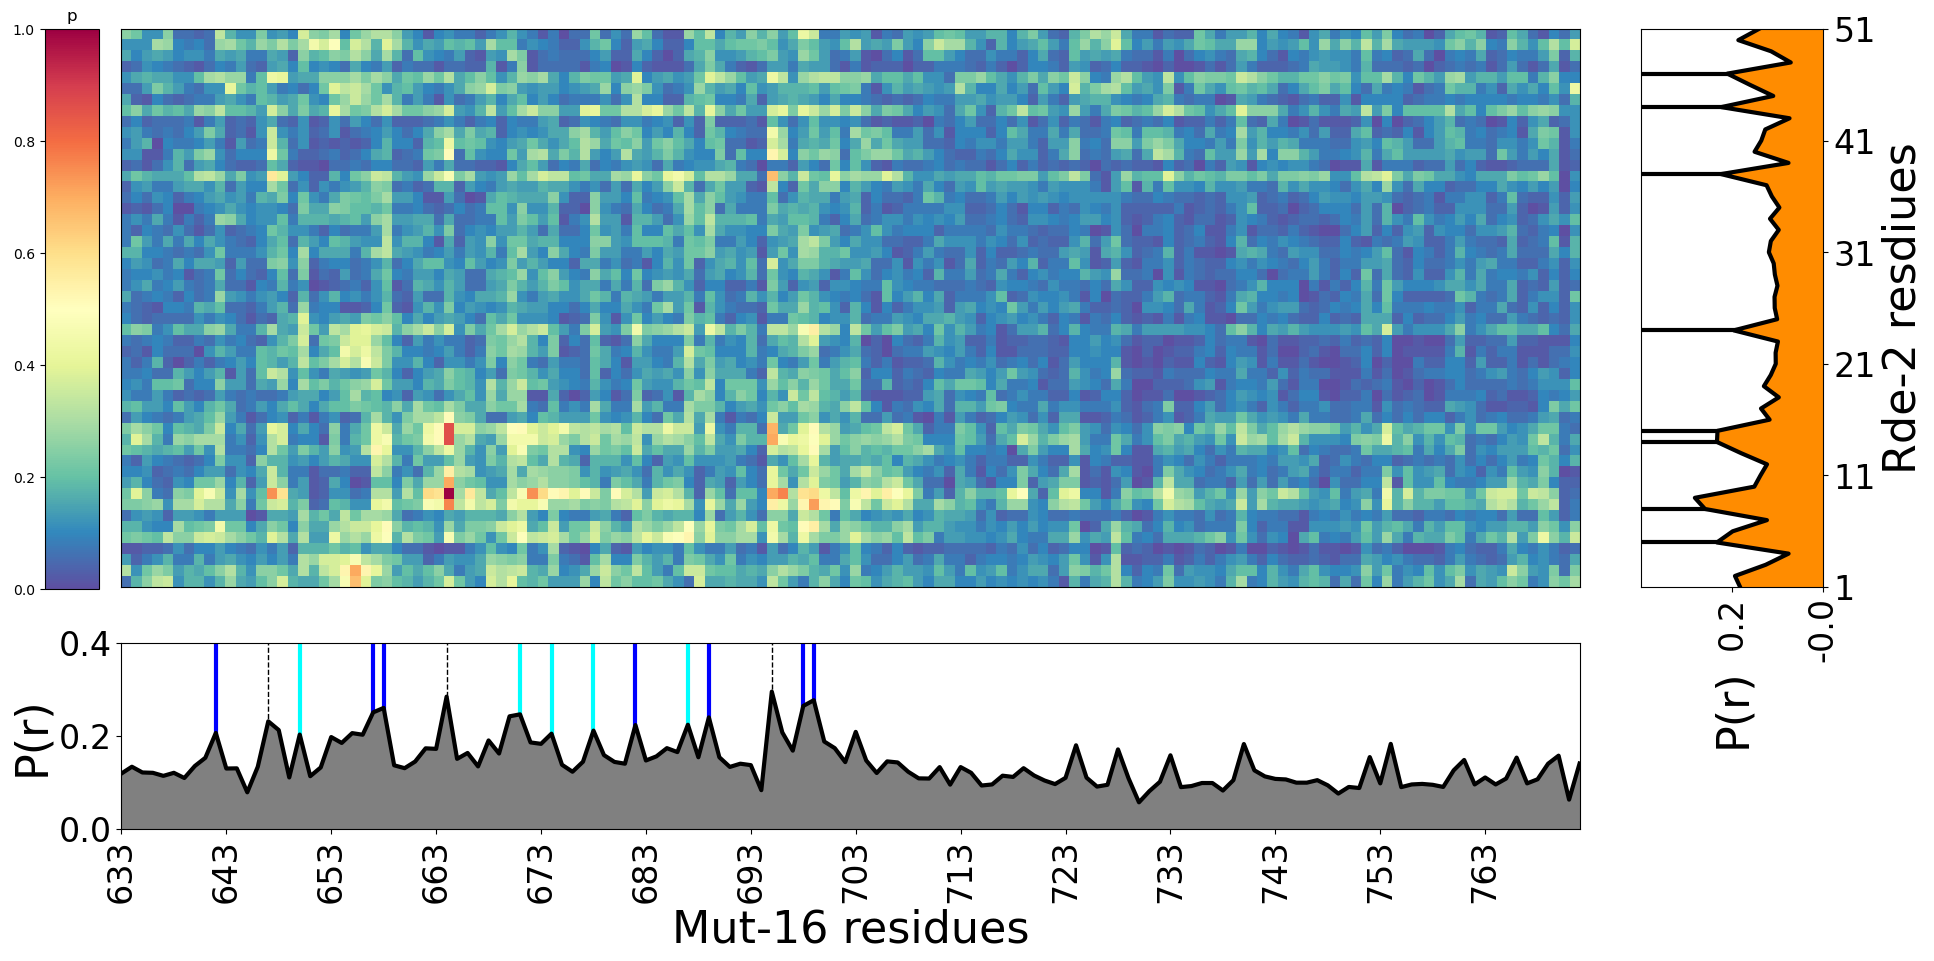

In [8]:
#for i, res_type in ["R", "K", "Y", "W"]:
    #pass

 

fig = plt.figure(figsize=(8*(140/51.), 51/51. * 10))
# fig = plt.figure(figsize=(5,5))
heights = [3,1]
widths = [8,1]
gspec = fig.add_gridspec(nrows=2,ncols=2,height_ratios=heights, width_ratios=widths)
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.075, 
                    hspace=0.15)

 

# -- Panel a --
ax = fig.add_subplot(gspec[0,0])
p = ax.imshow(mut16_rde2_matrix, origin='lower', cmap = "Spectral_r", aspect='auto')

 

#plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );
#plt.ylabel("Residue(r)")

 

#plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

 

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.040, 0.340, 0.025, 0.56])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')
cb.ax.yaxis.tick_left()
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])

 

#ax.xaxis.tick_top()

 

plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=32)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

 

# -- Panel b --
ax = fig.add_subplot(gspec[1,0])
plt.plot(np.mean(mut16_rde2_matrix, axis=0), color = "black", lw=3)

 

plt.ylabel(r"P(r)")
plt.xlabel('Mut-16 residues')
plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
#ax.axes.yaxis.set_ticks([])
plt.xlim(0,139.0)
plt.ylim(bottom=0, top=0.40)

 

y = np.mean(mut16_rde2_matrix, axis=0)
x = range(len(y))
# print (np.max(y))
ax.fill_between(x, 0, y, color = "gray")

 

for c, res in enumerate(mut16_resname):
    if res == 'ARG':
        ax.axvline(c, color='blue', lw=3, zorder=-1)

for c, res in enumerate(mut16_resname):
    if res == 'LYS':
        ax.axvline(c, color='cyan', lw=3, zorder=-1)

for c, res in enumerate(mut16_resname):       
    if res == 'PHE':
        ax.axvline(c, color='black', lw=1,linestyle='--', zorder=-1)

 

# -- Panel c --
ax = fig.add_subplot(gspec[0,1])
# plt.plot(range(51),np.mean(wt_contact_av_ar.T, axis=1), color = "red")
plt.plot(-np.mean(mut16_rde2_matrix, axis=1), range(51), color = "black", lw=3)

 

# plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
# plt.xlabel('Residue(r)')
# # plt.xticks(np.arange(0, 50, 10), np.arange(0, 51, 10)+1 );
plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10)+1);
plt.xticks(np.arange(0,-0.4,-0.2), np.arange(0,-0.4,-0.2)*-1,  rotation=90)
 

y = np.mean(mut16_rde2_matrix, axis=1)
x = range(len(y))
ax.fill_betweenx(x, -y, 0, color = "darkorange")

 

plt.ylim(bottom=0,top=50)
plt.xlim(right=0, left=-0.40)
ax.yaxis.tick_right()
#ax.axes.xaxis.set_ticks([])
plt.xlabel("P(r)", rotation = 90)
plt.ylabel('Rde-2 resdiues')
ax.yaxis.set_label_position("right")

 

for c, res in enumerate(rde2_resname):
    if res == 'TYR':
        ax.axhline(c, color='black', lw=3, zorder=-1)

plt.margins(0.1, 0.1)

fig.savefig('Combined_mut16_rbr_rde-2.png',dpi=400, bbox_inches="tight")
fig.savefig('Combined_mut16_rbr_rde-2.pdf',dpi=400, bbox_inches="tight")

In [9]:
u = mda.Universe("intial_equil.pdb", "dynamics_skip10.xtc")

/uni-mainz.de/homes/kugaurav/miniconda3/envs/myenv/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


In [10]:
mut16_res = list(u.residues)

mut16_resname = []
rde2_resname =[ ]

for residue in mut16_res[:140]:
    mut16_resname.append(residue.resname)

for res in mut16_res[14000:14051]:
    rde2_resname.append(res.resname)
#print (len(mut16_resname["TYR"]))
tyr_count_mut16_R = mut16_resname.count('PRO')
tyr_count_mut16_Y = mut16_resname.count('TYR')
tyr_count_rde2_Y = rde2_resname.count('TYR')
tyr_count_rde2_R = rde2_resname.count('PRO')
print (mut16_resname)
print (tyr_count_mut16_R,tyr_count_mut16_Y,tyr_count_rde2_R, tyr_count_rde2_Y)

['VAL', 'PRO', 'PRO', 'GLU', 'ASN', 'PRO', 'ALA', 'PRO', 'LEU', 'ARG', 'GLU', 'VAL', 'GLY', 'ASN', 'PHE', 'TYR', 'SER', 'LYS', 'SER', 'ASN', 'HIS', 'ASP', 'GLU', 'ASP', 'ARG', 'ARG', 'ASN', 'VAL', 'GLN', 'LEU', 'PRO', 'PHE', 'THR', 'PRO', 'ALA', 'ASP', 'THR', 'HIS', 'LYS', 'PRO', 'ILE', 'LYS', 'VAL', 'ALA', 'PRO', 'LYS', 'GLU', 'PRO', 'VAL', 'ARG', 'ASN', 'PRO', 'LEU', 'LEU', 'LYS', 'GLU', 'ARG', 'PRO', 'SER', 'ALA', 'ASN', 'GLY', 'PHE', 'ILE', 'ASN', 'ARG', 'ARG', 'LEU', 'PRO', 'SER', 'HIS', 'PRO', 'ALA', 'PRO', 'PRO', 'PRO', 'VAL', 'ASN', 'GLN', 'SER', 'GLN', 'PRO', 'ALA', 'ASN', 'GLN', 'PRO', 'MET', 'GLN', 'THR', 'ALA', 'VAL', 'TYR', 'GLN', 'ASN', 'SER', 'HIS', 'PRO', 'GLY', 'ALA', 'PRO', 'TYR', 'ILE', 'PRO', 'GLN', 'GLN', 'PRO', 'THR', 'TYR', 'GLN', 'PRO', 'GLN', 'LEU', 'PRO', 'VAL', 'GLN', 'GLN', 'PRO', 'GLN', 'PRO', 'HIS', 'GLN', 'TYR', 'ALA', 'PRO', 'GLN', 'PRO', 'ILE', 'HIS', 'HIS', 'GLN', 'GLN', 'PRO', 'ILE', 'HIS', 'GLN', 'PRO', 'MET', 'HIS', 'GLY', 'GLN']
30 5 6 8


In [11]:
# Create an empty matrix to hold the combined results
matrix_combined = []

 

# Loop over the amino acids to create the combined matrix
for i, aa_i in enumerate(rde2_resname):
    row_combined = []
    for j, aa_j in enumerate(mut16_resname):
        # Get the value for the current pairwise combination of amino acids
        value_ij = mut16_rde2_matrix[i][j]
        # Create a tuple containing the amino acid codes and the associated value
        element_combined = (aa_i, aa_j, value_ij)
        # Append the element to the current row of the combined matrix
        row_combined.append(element_combined)
    # Append the row to the combined matrix
    matrix_combined.append(row_combined)

 

# Print the resulting matrix
matrix_np_comb=np.array(matrix_combined)
print (matrix_np_comb)

[[['MET' 'VAL' '0.058823529411764705']
  ['MET' 'PRO' '0.17647058823529413']
  ['MET' 'PRO' '0.2549019607843137']
  ...
  ['MET' 'HIS' '0.2549019607843137']
  ['MET' 'GLY' '0.2156862745098039']
  ['MET' 'GLN' '0.29411764705882354']]

 [['HIS' 'VAL' '0.3137254901960784']
  ['HIS' 'PRO' '0.11764705882352941']
  ['HIS' 'PRO' '0.2156862745098039']
  ...
  ['HIS' 'HIS' '0.23529411764705882']
  ['HIS' 'GLY' '0.058823529411764705']
  ['HIS' 'GLN' '0.23529411764705882']]

 [['ASN' 'VAL' '0.13725490196078433']
  ['ASN' 'PRO' '0.0392156862745098']
  ['ASN' 'PRO' '0.0784313725490196']
  ...
  ['ASN' 'HIS' '0.0784313725490196']
  ['ASN' 'GLY' '0.058823529411764705']
  ['ASN' 'GLN' '0.1568627450980392']]

 ...

 [['ASN' 'VAL' '0.1568627450980392']
  ['ASN' 'PRO' '0.0980392156862745']
  ['ASN' 'PRO' '0.13725490196078433']
  ...
  ['ASN' 'HIS' '0.23529411764705882']
  ['ASN' 'GLY' '0.0392156862745098']
  ['ASN' 'GLN' '0.17647058823529413']]

 [['ARG' 'VAL' '0.11764705882352941']
  ['ARG' 'PRO' '0.117

In [12]:
# a / c_array

[[ 18.  16.  64.   3.   0.   5.  91.  40.  36.  23.  15.  14.  11.  12.
   84.  51.  13.   0.  77.  26.]
 [ 16.  14.  52.   3.   0.   5.  75.  32.  30.  19.  13.  12.   9.  10.
   72.  41.  11.   0.  61.  22.]
 [ 64.  52. 120.  18.   0.  30. 194.  64.  84.  50.  46.  40.  22.  28.
  240.  86.  34.   0. 110.  68.]
 [  3.   3.  18.   0.   0.   0.  24.  12.   9.   6.   3.   3.   3.   3.
   18.  15.   3.   0.  24.   6.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  5.   5.  30.   0.   0.   0.  40.  20.  15.  10.   5.   5.   5.   5.
   30.  25.   5.   0.  40.  10.]
 [ 91.  75. 194.  24.   0.  40. 304. 108. 129.  78.  67.  59.  35.  43.
  354. 143.  51.   0. 192. 102.]
 [ 40.  32.  64.  12.   0.  20. 108.  32.  48.  28.  28.  24.  12.  16.
  144.  44.  20.   0.  52.  40.]
 [ 36.  30.  84.   9.   0.  15. 129.  48.  54.  33.  27.  24.  15.  18.
  144.  63.  21.   0.  87.  42.]
 [ 23.  19.  50.   6.   0.  10.  78.  28.  33.  20.  17

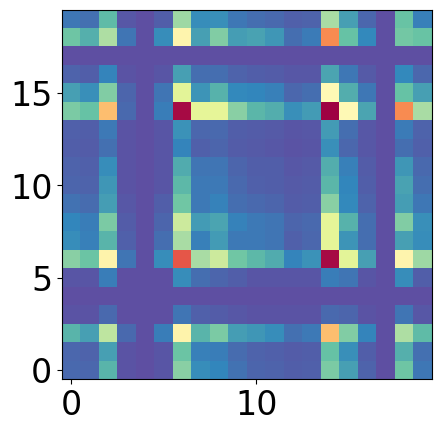

In [13]:
# Create a dictionary to map amino acid names to indices in the matrix
aa_dict = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7,
           'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15,
           'THR': 16, 'TRP': 17, 'TYR': 18, 'VAL': 19}

 

# Initialize the matrix to zeros
aa_matrix = np.zeros((20, 20))
aa_matrix_count = np.zeros((20, 20))

 

for row in matrix_np_comb:
    for element in row:
        idx1 = aa_dict[element[0]]
        idx2 = aa_dict[element[1]]
        aa_matrix[idx1,idx2] += float(element[2])
        aa_matrix[idx2,idx1] += float(element[2])
        aa_matrix_count[idx1,idx2] += 1
        aa_matrix_count[idx2,idx1] += 1

aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

plt.figure(101)

plt.imshow(aa_matrix_count, cmap = 'Spectral_r', origin='lower')


print (aa_matrix_count)
print (aa_matrix)
#print (aa_matrix_normalized)

In [14]:
# Step 1: Transpose the matrix
transposed_matrix = np.transpose(aa_matrix)

 

# Step 2: Flip the matrix along the y-axis
flipped_matrix = np.flipud(transposed_matrix)

 

# Resulting matrix after rotating along the x-axis
result_aa_matrix = flipped_matrix

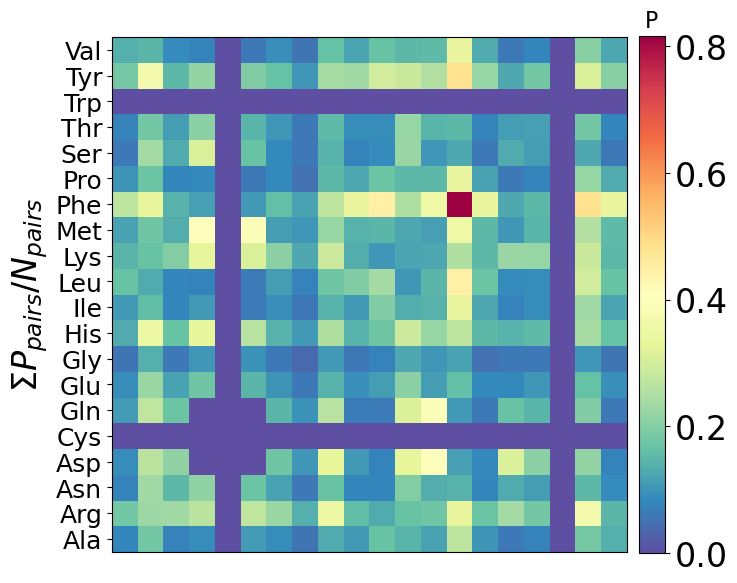

In [15]:
# Define the names of the amino acids in alphabetical order
amino_acids = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val']

 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,8))

 

# Create a heatmap with the matrix and set the colormap to 'Spectral_r'
im = ax.imshow(aa_matrix_normalized, cmap="Spectral_r", origin='lower')

 

# Set the tick labels for both axes to the amino acid names
ax.set_xticks(np.arange(20))
#ax.set_xticklabels(amino_acids)
ax.set_yticks(np.arange(20))
ax.set_yticklabels(amino_acids[::], fontsize=18)
ax.axes.xaxis.set_ticks([])
 

# Rotate the tick labels on the x-axis to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=90)

 

# Add a colorbar to the right of the heatmap
# cax = fig.add_axes([pos.width+0.01, pos.y0, pos.width/30, pos.height])
cb = plt.colorbar(im, shrink=0.84, pad=0.02)
cb.ax.set_title("P", fontsize=16)

 

# labels = []
# cb.set_ticks(labels)

 

# Set the title and axis labels
# ax.set_title('Amino Acid Matrix')
#ax.set_xlabel('Amino Acids')
ax.set_ylabel(r'$\Sigma P_{pairs}/N_{pairs}$', fontsize=24)

 

# Show the plot
# plt.show()

plt.savefig("Resdiue_type_2D.png", dpi=400, bbox_inches="tight")

plt.savefig("Amino_acid_contact_map2D.png", dpi=600,bbox_inches="tight")
plt.savefig("Amino_acid_contact_map.pdf", dpi=400)

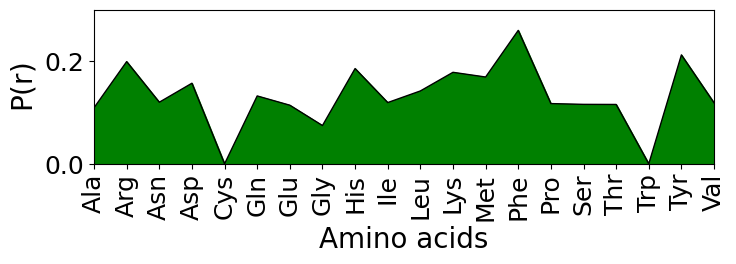

In [16]:
fig, ax = plt.subplots(figsize=(8,2))

plt.plot(np.mean(aa_matrix_normalized, axis=0), color = "black", lw=1)

plt.xticks(np.arange(20), rotation=90);
ax.set_xticklabels(amino_acids, fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(0,19)
plt.ylim(0,0.3)
y = np.mean(aa_matrix_normalized, axis=0)
x = range(len(y))

ax.fill_between(x, 0, y, color = "green")
plt.ylabel(r"$\mathrm{P(r)}$", fontsize=20)
plt.xlabel('Amino acids', fontsize=20)

plt.savefig("residue_type_1D.png", dpi=400, bbox_inches="tight")

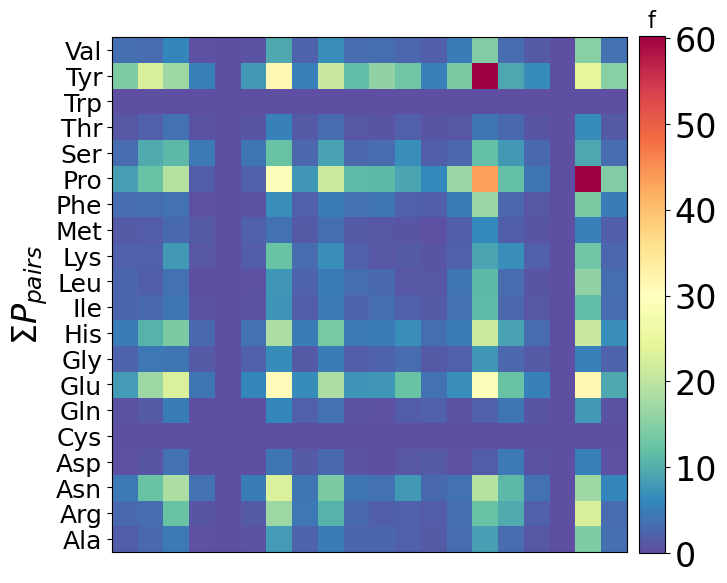

In [18]:
# Define the names of the amino acids in alphabetical order
amino_acids = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val']

 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,8))

 

# Create a heatmap with the matrix and set the colormap to 'Spectral_r'
im = ax.imshow(aa_matrix, cmap="Spectral_r", origin='lower')

 

# Set the tick labels for both axes to the amino acid names
ax.set_xticks(np.arange(20))
#ax.set_xticklabels(amino_acids)
ax.set_yticks(np.arange(20))
ax.set_yticklabels(amino_acids[::], fontsize=18)
ax.axes.xaxis.set_ticks([])
 

# Rotate the tick labels on the x-axis to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=90)

 

# Add a colorbar to the right of the heatmap
# cax = fig.add_axes([pos.width+0.01, pos.y0, pos.width/30, pos.height])
cb = plt.colorbar(im, shrink=0.84, pad=0.02)
cb.ax.set_title("f", fontsize=16)

 

# labels = []
# cb.set_ticks(labels)

 

# Set the title and axis labels
# ax.set_title('Amino Acid Matrix')
#ax.set_xlabel('Amino Acids')
ax.set_ylabel(r'$\Sigma P_{pairs}$', fontsize=24)

 

# Show the plot
# plt.show()

plt.savefig("Resdiue_type_2D_unnormalized.png", dpi=400, bbox_inches="tight")

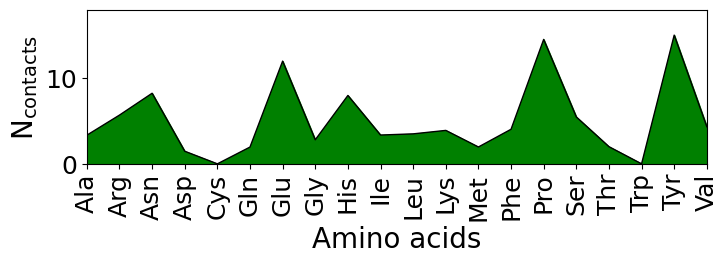

In [25]:
fig, ax = plt.subplots(figsize=(8,2))

plt.plot(np.mean(aa_matrix, axis=0), color = "black", lw=1)

plt.xticks(np.arange(20), rotation=90);
ax.set_xticklabels(amino_acids, fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(0,19)
plt.ylim(0,18)
y = np.mean(aa_matrix, axis=0)
x = range(len(y))

ax.fill_between(x, 0, y, color = "green")
plt.ylabel(r"$\mathrm{N_{contacts}}$", fontsize=20)
plt.xlabel('Amino acids', fontsize=20)

plt.savefig("residue_type_1D_unnormalised.png", dpi=400, bbox_inches="tight")

(20, 20)


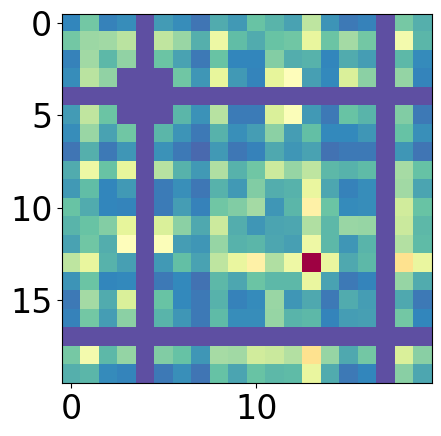

In [106]:
# Create a dictionary to map amino acid names to indices in the matrix
aa_dict = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7,
           'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15,
           'THR': 16, 'TRP': 17, 'TYR': 18, 'VAL': 19}

 

# Initialize the matrix to zeros
aa_matrix = np.zeros((20, 20))
aa_matrix_count = np.zeros((20, 20))

 

for row in matrix_np_comb:
    for element in row:
        idx1 = aa_dict[element[0]]
        idx2 = aa_dict[element[1]]
        aa_matrix[idx1,idx2] += float(element[2])
        aa_matrix[idx2,idx1] += float(element[2])
        aa_matrix_count[idx1,idx2] += 1
        aa_matrix_count[idx2,idx1] += 1

 


# aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

plt.figure(101)

plt.imshow(aa_matrix_normalized, cmap = 'Spectral_r')

print (aa_matrix.shape)

In [97]:
# Step 1: Transpose the matrix
transposed_matrix = np.transpose(aa_matrix_count)

 

# Step 2: Flip the matrix along the y-axis
flipped_matrix = np.flipud(transposed_matrix)

 

# Resulting matrix after rotating along the x-axis
result_aa_matrix = flipped_matrix

Text(0, 0.5, '$<N_{contact}>/N_{pairs}$')

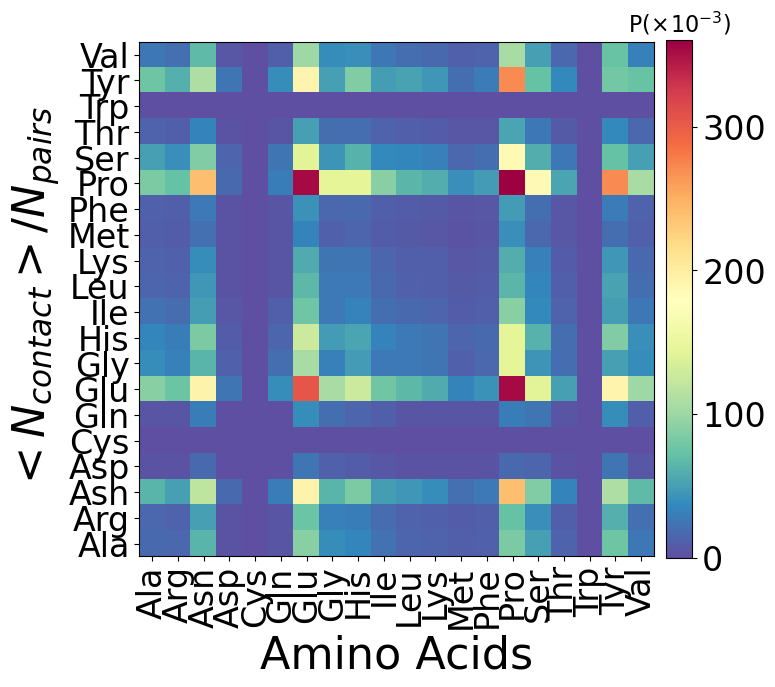

In [98]:
# Define the names of the amino acids in alphabetical order
amino_acids = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val']

 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,8))

 

# Create a heatmap with the matrix and set the colormap to 'Spectral_r'
im = ax.imshow(result_aa_matrix, cmap="Spectral_r")

 

# Set the tick labels for both axes to the amino acid names
ax.set_xticks(np.arange(20))
ax.set_xticklabels(amino_acids)
ax.set_yticks(np.arange(20))
ax.set_yticklabels(amino_acids[::-1])

 

# Rotate the tick labels on the x-axis to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=90)

 

# Add a colorbar to the right of the heatmap
# cax = fig.add_axes([pos.width+0.01, pos.y0, pos.width/30, pos.height])
cb = plt.colorbar(im, shrink=0.84, pad=0.02)
cb.ax.set_title(r"P($\!\times\!$$10^{-3}$)", fontsize=16)

 

# labels = []
# cb.set_ticks(labels)

 

# Set the title and axis labels
# ax.set_title('Amino Acid Matrix')
ax.set_xlabel('Amino Acids')
ax.set_ylabel(r'$<N_{contact}>/N_{pairs}$')

 

# Show the plot
# plt.show()

 

# plt.savefig("Amino_acid_contact_map2D.png", dpi=600,bbox_inches="tight")
# plt.savefig("Amino_acid_contact_map.pdf", dpi=400)

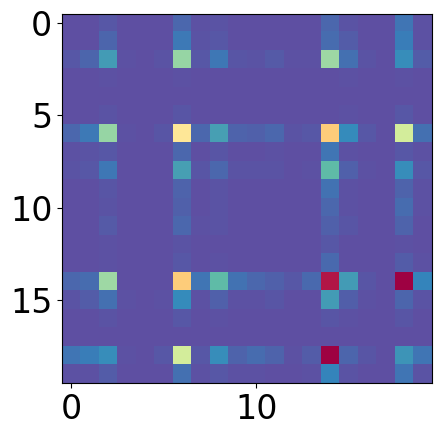

In [91]:
# Create a dictionary to map amino acid names to indices in the matrix
aa_dict = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7,
           'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15,
           'THR': 16, 'TRP': 17, 'TYR': 18, 'VAL': 19}

 

# Initialize the matrix to zeros
aa_matrix = np.zeros((20, 20))
aa_matrix_count = np.zeros((20, 20))

 

for row in matrix_np_comb:
    for element in row:
        idx1 = aa_dict[element[0]]
        idx2 = aa_dict[element[1]]
        aa_matrix[idx1,idx2] += float(element[2])
        aa_matrix[idx2,idx1] += float(element[2])
        aa_matrix_count[idx1,idx2] += 1
        aa_matrix_count[idx2,idx1] += 1
        

aa_matrix_normalized = (aa_matrix*aa_matrix_count)/51*140

# aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

#aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

plt.figure(101)

plt.imshow(aa_matrix_normalized, cmap = 'Spectral_r')


In [92]:
# Step 1: Transpose the matrix
transposed_matrix = np.transpose(aa_matrix)

 

# Step 2: Flip the matrix along the y-axis
flipped_matrix = np.flipud(transposed_matrix)

 

# Resulting matrix after rotating along the x-axis
result_aa_matrix = flipped_matrix

Text(0, 0.5, '$<N_{contact}>/N_{pairs}$')

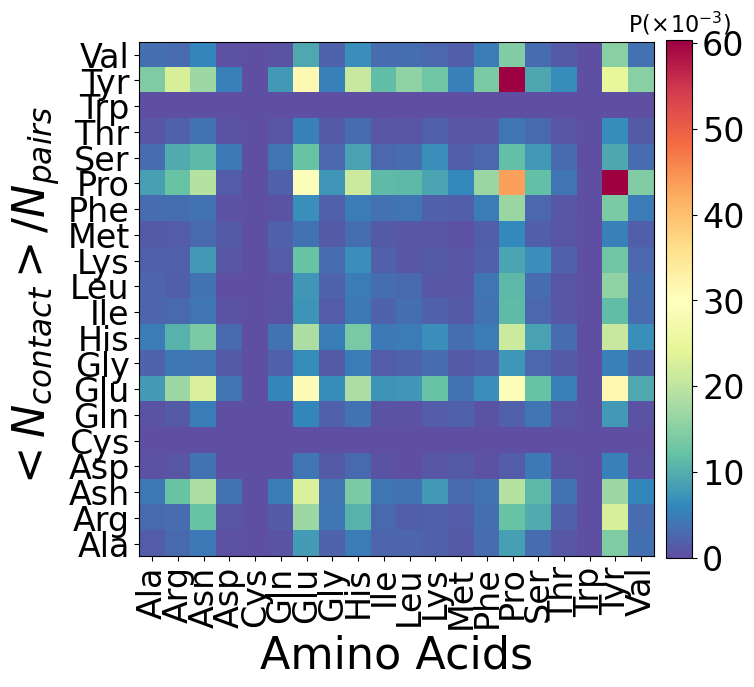

In [93]:
# Define the names of the amino acids in alphabetical order
amino_acids = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val']

 

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,8))

 

# Create a heatmap with the matrix and set the colormap to 'Spectral_r'
im = ax.imshow(result_aa_matrix, cmap="Spectral_r")

 

# Set the tick labels for both axes to the amino acid names
ax.set_xticks(np.arange(20))
ax.set_xticklabels(amino_acids)
ax.set_yticks(np.arange(20))
ax.set_yticklabels(amino_acids[::-1])

 

# Rotate the tick labels on the x-axis to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=90)

 

# Add a colorbar to the right of the heatmap
# cax = fig.add_axes([pos.width+0.01, pos.y0, pos.width/30, pos.height])
cb = plt.colorbar(im, shrink=0.84, pad=0.02)
cb.ax.set_title(r"P($\!\times\!$$10^{-3}$)", fontsize=16)

 

# labels = []
# cb.set_ticks(labels)

 

# Set the title and axis labels
# ax.set_title('Amino Acid Matrix')
ax.set_xlabel('Amino Acids')
ax.set_ylabel(r'$<N_{contact}>/N_{pairs}$')


In [89]:
# Create a dictionary to map amino acid names to indices in the matrix
aa_dict = {'PHE': 0, 'TYR': 1, 'ARG': 2, 'LYS': 3, 'ASP': 4, 'GLU': 5, 'SER': 6, 'THR': 7, 'ASN': 8}

 

# Initialize the matrix to zeros
aa_matrix = np.zeros((8, 8))
aa_matrix_count = np.zeros((8, 8))

 

for row in matrix_np_comb:
    for element in row:
        if element[0] in aa_dict and element[1] in aa_dict:
            idx1 = aa_dict[element[0]]
            idx2 = aa_dict[element[1]]
            aa_matrix[idx1,idx2] += float(element[2])
            aa_matrix[idx2,idx1] += float(element[2])
            aa_matrix_count[idx1,idx2] += 1
            aa_matrix_count[idx2,idx1] += 1
            


# aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

aa_matrix_normalized = np.divide(aa_matrix, aa_matrix_count, out=np.zeros_like(aa_matrix), where=aa_matrix_count!=0)

plt.figure(101)

plt.imshow(aa_matrix_normalized, cmap = 'Spectral_r')

print (aa_matrix.shape)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [20]:
Mut16_CALVADOS = np.load("/localscratch/kugaurav/Phd_projects/Mut-16_project/CALVADOS_Simulations/mut16_RBR_wt_rde2/Mut16_rbr_Rde2.npy")
print (Mut16_CALVADOS)

[[0.01 0.   0.   ... 0.01 0.   0.01]
 [0.   0.   0.   ... 0.01 0.   0.01]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.   0.   ... 0.   0.   0.  ]
 [0.01 0.   0.   ... 0.   0.   0.01]]


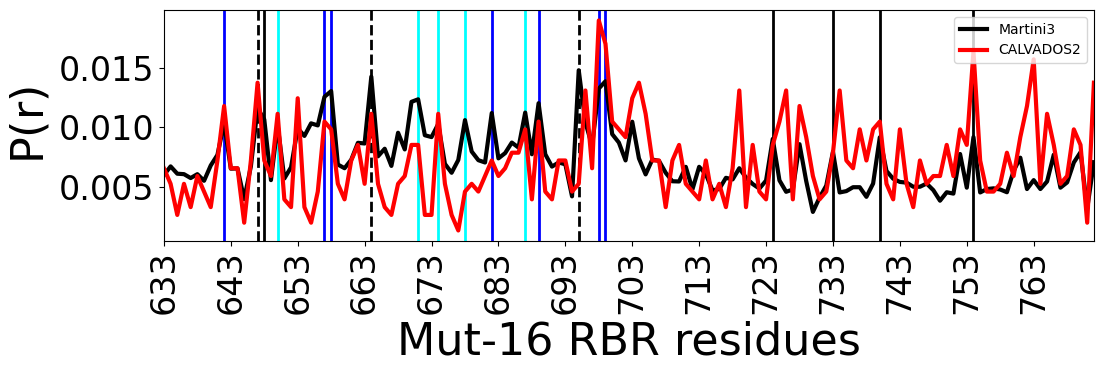

In [39]:
fig, ax = plt.subplots(figsize=(12,3))

plt.plot(np.mean(mut16_rde2_matrix, axis=0)/np.sum(np.mean(mut16_rde2_matrix, axis=0)), color = "black", lw=3, label="Martini3")
plt.plot(np.mean(Mut16_CALVADOS, axis=0)/np.sum(np.mean(Mut16_CALVADOS, axis=0)), color = "red", lw=3, label="CALVADOS2")

plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
plt.xlim(0,139.0)
#plt.ylim(bottom=0, top=0.40)
for c, res in enumerate(mut16_resname):
    if res == 'ARG':
        ax.axvline(c, color='blue', lw=2, zorder=-1)

for c, res in enumerate(mut16_resname):
    if res == 'LYS':
        ax.axvline(c, color='cyan', lw=2, zorder=-1)

for c, res in enumerate(mut16_resname):       
    if res == 'PHE':
        ax.axvline(c, color='black', lw=2,linestyle='--', zorder=-1)
        
for c, res in enumerate(mut16_resname):       
    if res == 'TYR':
        ax.axvline(c, color='black', lw=2, zorder=-1)


plt.ylabel(r"$\mathrm{P(r)}$")
plt.xlabel('Mut-16 RBR residues')
plt.legend()

fig.savefig('Martini3_CALVADOS_comparison_mut16.png',dpi=400, bbox_inches="tight")

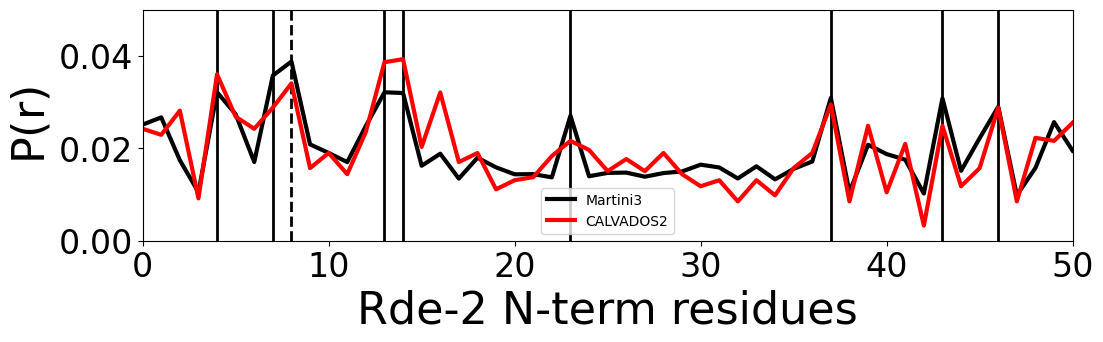

In [40]:
fig, ax = plt.subplots(figsize=(12,3))

plt.plot(np.mean(mut16_rde2_matrix, axis=1)/np.sum(np.mean(mut16_rde2_matrix, axis=1)), color = "black", lw=3, label="Martini3")
plt.plot(np.mean(Mut16_CALVADOS, axis=1)/np.sum(np.mean(Mut16_CALVADOS, axis=1)), color = "red", lw=3, label="CALVADOS2")

# plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
plt.xlim(0,50)
plt.ylim(bottom=0, top=0.050)
for c, res in enumerate(rde2_resname):       
    if res == 'PHE':
        ax.axvline(c, color='black', lw=2,linestyle='--', zorder=-1)
        
for c, res in enumerate(rde2_resname):       
    if res == 'TYR':
        ax.axvline(c, color='black', lw=2, zorder=-1)


plt.ylabel(r"$\mathrm{P(r)}$")
plt.xlabel('Rde-2 N-term residues')
plt.legend()

fig.savefig('Martini3_CALVADOS_comparison_rde2.png',dpi=400, bbox_inches="tight")

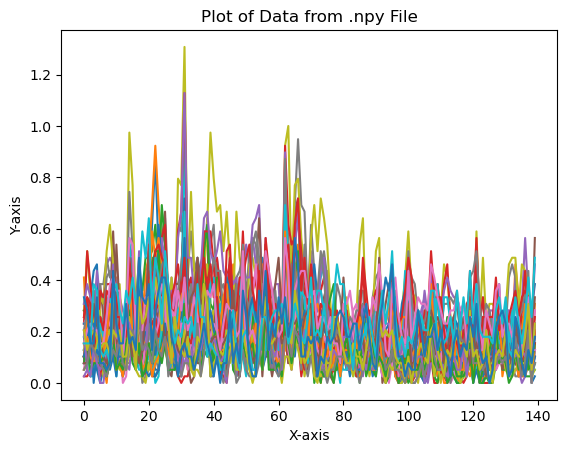

In [4]:
# Plot the data
plt.plot(data)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Plot of Data from .npy File")
plt.show()

In [5]:
def interchain_contact_arrays_simple(uni, n_chains_1, n_chains_2, n_residues_1, n_residues_2,
                                     dimensions, cutoff=5,
                             backend="serial", exclude_nearest_neighbors=2):
    
    out_frame_ar = np.zeros((n_residues_1, n_residues_2)) # , dtype=int
    print(dimensions)
    start_chain2 = n_residues_1 * n_chains_1
    
    # going through all pairs of chains
    for i in range(n_chains_1):
        #print(i)
            
        sel_chain_i = uni.residues[i*n_residues_1: (i+1)*n_residues_1]
            
        #for j in range(n_chains_1, n_chains_1+n_chains_2):
        for j in range(n_chains_2):
            #print(j)
            
            
            #sel_chai_j = uni.residues[ j*n_residues_2: (j+1)*n_residues_2]
            sel_chain_j = uni.residues[start_chain2 + j*n_residues_2:  start_chain2 + (j+1)*n_residues_2]
          
            #sel_chain_j = uni.residues[j*n_residues_2: (j+1)*n_residues_2]
            
            for ri_chain1 in range(n_residues_1):
                for ri_chain2 in range(n_residues_2):
                
                    distmat = distance_array(sel_chain_i[ri_chain1].atoms.positions,
                                        sel_chain_j[ri_chain2].atoms.positions,
                                        result= np.zeros((sel_chain_i[ri_chain1].atoms.n_atoms,
                                                         sel_chain_j[ri_chain2].atoms.n_atoms)),
                                                   box=dimensions,
                                                   backend=backend)

                    # any distance larger than 5 A?
                    in_contact = np.less(distmat,cutoff) 
            
                    if np.any(in_contact):
                       out_frame_ar[ri_chain1, ri_chain2] += 1
            
            #np apply along axis shoud work
            #check_r = lambda ar, r: ar<= r
            
            # https://docs.mdanalysis.org/stable/_modules/MDAnalysis/analysis/contacts.html#soft_cut_q
            #cutoff = np.asarray(cutoff)
            #y = distmat <= cutoff
            
            #if i == j:
                # neighborhood = set([residue.index+i for i in range(-n, n+1)])
            #    y = exclude_exclude_nearest_neighbors(n_residues, y,
            #                                          exclude_nearest_neighbors) 
            
            #out_frame_ar += y
                    
    return out_frame_ar


def exclude_exclude_nearest_neighbors(n_residues,
                                      contact_array, exclude_nearest_neighbors):  
    for n in range(n_residues): 
        
        neighborhood = set([n+i for i in range(
            -exclude_nearest_neighbors, exclude_nearest_neighbors+1)])
        index_l = [idx for idx in neighborhood if idx in range(n_residues)]
        
        for ind in index_l:
            contact_array[n, ind] = 0
            contact_array[ind, n] = 0
            
    return contact_array
    

In [6]:
class FindChainsContactArrays(AnalysisBase):  # subclass AnalysisBase
    def __init__(self, atomgroup, n_chains_1, n_chains_2, n_residues_1, n_residues_2, cut_off=6,
                backend="serial", verbose=True):
        self.atomgroup = atomgroup
        self.n_chains_1 = n_chains_1
        self.n_residues_1 = n_residues_1
        self.n_chains_2 = n_chains_2
        self.n_residues_2 = n_residues_2
        self.radius = cut_off
        
        self.backend = backend
        
        trajectory = atomgroup.universe.trajectory
        print(trajectory.n_frames)
        super(FindChainsContactArrays, self).__init__(trajectory,
                                               verbose=verbose)
        
    def _prepare(self):
        # This must go here, instead of __init__, because
        # it depends on the number of frames specified in run().
            
        self.results = np.zeros((
            self.atomgroup.universe.trajectory.n_frames,
            self.n_residues_1,
            self.n_residues_2))[self.start:self.stop:self.step]
        
        print(self.results.shape)
        
        #self.out_frame_ar = np.zeros((n_chains, n_chains))
        
        #n_atoms_per_chain = uni.residues[:n_residues].__len__()
        
    def _single_frame(self):
        chain_in_contact_ar = interchain_contact_arrays_simple(
            self.atomgroup, self.n_chains_1, self.n_chains_2, self.n_residues_1, self.n_residues_2,
            self._ts.dimensions,
            backend=self.backend, cutoff=self.radius)  
        #print(chain_in_contact_ar)
        self.results[self._frame_index, :, :] = chain_in_contact_ar
    
    def _conclude(self):
        return self.results

In [7]:
np.arange(200,393, 50).__len__()

4

In [8]:
ls

al_contacts_mut16-rde2.pdf        Contact_matrix.npy*
all_contacts_mut16-rde2.png       dynamics_skip10.xtc*
Combined_mut16_rde-2_plot.pdf     intial_equil.pdb*
Combined_mut16_rde-2_plot.png     sum_any-contact-residues_contacts_mut16.pdf
Contact_Map_all_atom-fin1.ipynb*  sum_any-contact-residues_contacts_mut16.png
Contact_Map_all_atom-fin1.py*


In [9]:
u_wt = mda.Universe("intial_equil.pdb",
                        "dynamics_skip10.xtc")
u_wt.trajectory.n_frames

/uni-mainz.de/homes/kugaurav/miniconda3/envs/myenv/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


393

In [10]:
#n_chains_1, n_chain_2, n_residues_1, n_residues_2
wt_300K_contacts_simple = FindChainsContactArrays(u_wt, 100,10, 140, 51,
                                                  cut_off=6)

%time wt_300K_contacts_simple.run(200,393,50)

393
(4, 140, 51)


  0%|          | 0/4 [00:00<?, ?it/s]

[152.40839 152.40839 609.63324  90.       90.       90.     ]
[152.46092 152.46092 609.8434   90.       90.       90.     ]
[152.44202 152.44202 609.76776  90.       90.       90.     ]
[152.37543 152.37543 609.5014   90.       90.       90.     ]
CPU times: user 37min 17s, sys: 1.06 s, total: 37min 19s
Wall time: 37min 18s


In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [14]:
wt_contact_av_ar = wt_300K_contacts_simple.results.mean(axis=0)


In [15]:
print (wt_contact_av_ar)

[[0.   0.5  0.   ... 0.   0.25 0.75]
 [0.25 0.   0.   ... 0.   0.   0.75]
 [0.5  0.   0.   ... 0.   0.   0.25]
 ...
 [0.75 0.5  0.   ... 0.75 0.25 0.  ]
 [0.5  0.   0.   ... 0.25 0.75 0.25]
 [0.75 0.5  0.   ... 0.25 0.75 0.  ]]


In [16]:
Mut16_atoms = u_wt.residues.atoms[:32700]
Arginine_residues = Mut16_atoms.residues.resids[:140][(Mut16_atoms.residues.resnames[:140] == 'ARG')]
Lysine_residues = Mut16_atoms.residues.resids[:140][(Mut16_atoms.residues.resnames[:140] == 'LYS')]
print (Arginine_residues)
print (Lysine_residues)

[642 657 658 682 689 698 699]
[650 671 674 678 687]


In [17]:
Rde2_atoms = u_wt.residues.atoms[32701:34020]
Tyr_residues = Rde2_atoms.residues.resids[:51][(Rde2_atoms.residues.resnames[:51] == 'TYR')]
Phe_residues = Rde2_atoms.residues.resids[:51][(Rde2_atoms.residues.resnames[:51] == 'PHE')]
print (Tyr_residues)

[ 5  8 14 15 24 38 44 47]


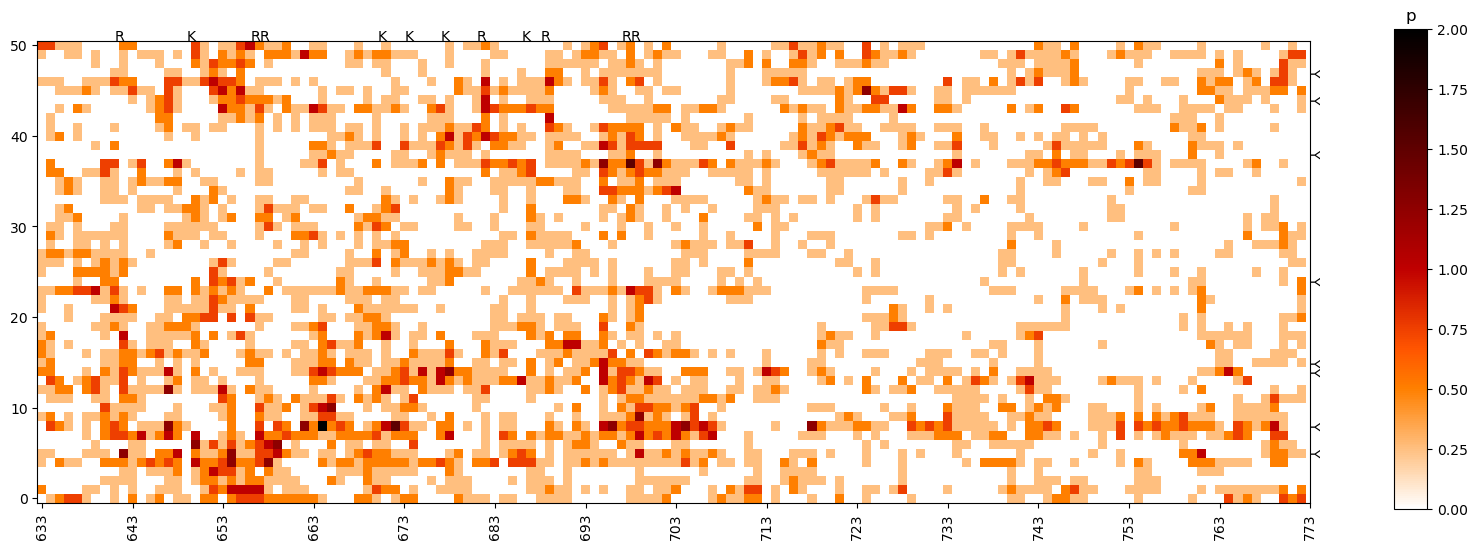

In [18]:
fig, ax = plt.subplots(figsize=(6*(140/51.), 51/51. * 6))

p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "gist_heat_r")

plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );

plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.90, 0.1, 0.02, 0.8])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')

for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    ax.annotate("R", xy=((arg_res-633-1), 50+0.5))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
for lys_res in Lysine_residues:
    ax.annotate("K", xy=((lys_res-633-1), 50+0.5))
    
for tyr_res in Tyr_residues:
    ax.annotate("Y", xy=(140-0.5, (tyr_res)), rotation=-90)
    
#ax.annotate("F", xy=((Phe_residues-1.25), 140+0.02325))

fig.savefig('all_contacts_mut16-rde2.png',dpi=400)
fig.savefig('al_contacts_mut16-rde2.pdf',dpi=400)

In [19]:
np.save("Contact_matrix_Mut16_RBR_Rde2.npy",wt_contact_av_ar.T )

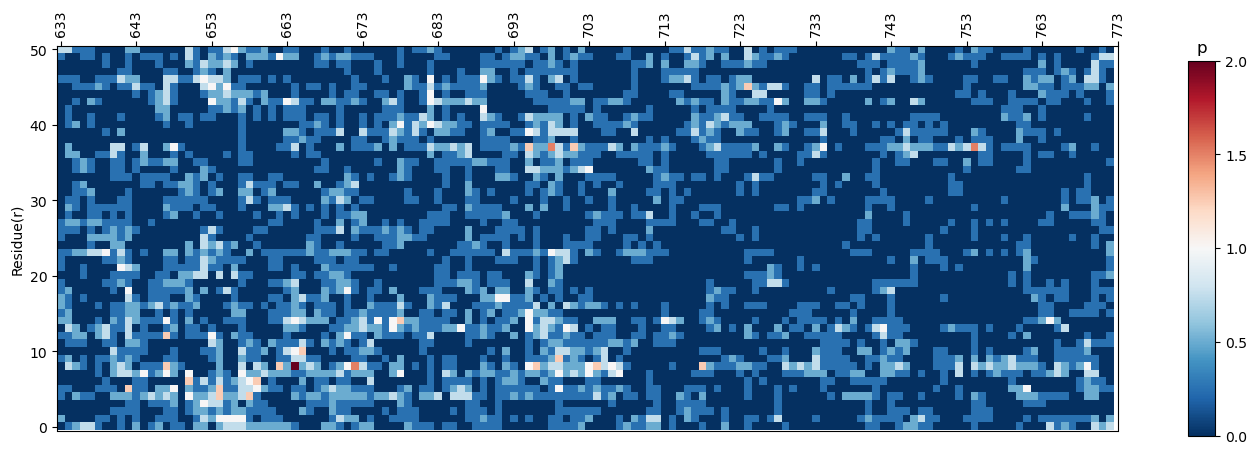

In [20]:
fig, ax = plt.subplots(figsize=(5*(140/51.), 51/51. * 5))

p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "RdBu_r")

plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );
plt.ylabel("Residue(r)")

plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.90, 0.1, 0.02, 0.75])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')


ax.xaxis.tick_top()

plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

#for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    #ax.annotate("R", xy=((arg_res-633-1), 50+0.5))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
#for lys_res in Lysine_residues:
    #ax.annotate("K", xy=((lys_res-633-1), 50+0.5))
    
#for tyr_res in Tyr_residues:
    #ax.annotate("Y", xy=(140-0.5, (tyr_res)), rotation=-90)
    
#ax.annotate("F", xy=((Phe_residues-1.25), 140+0.02325))

#fig.savefig('all_contacts_mut16-rde2.png',dpi=400)
#fig.savefig('al_contacts_mut16-rde2.pdf',dpi=400)

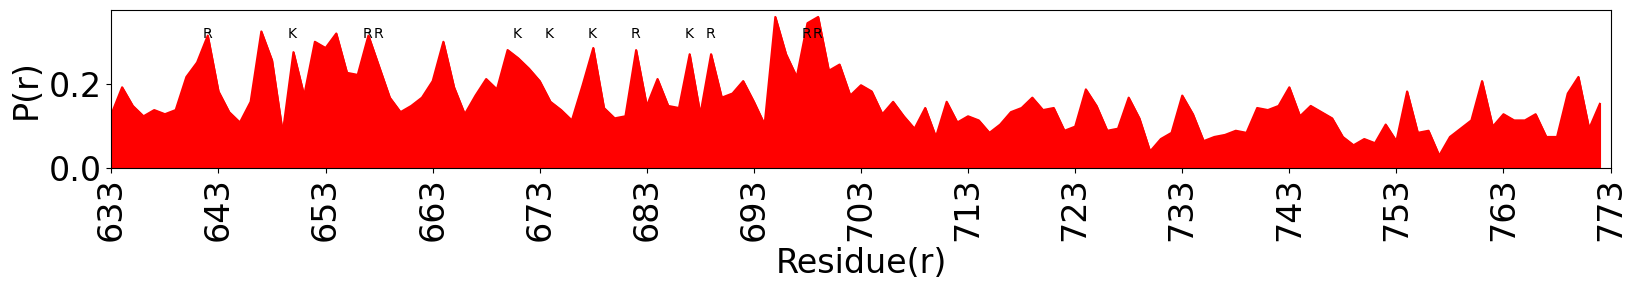

In [21]:
fig, ax = plt.subplots(figsize=(6*(140/51.), 51/51. * 3))

plt.plot(np.mean(wt_contact_av_ar.T, axis=0), color = "red")

plt.ylabel(r"P(r)")
plt.xlabel('Residue(r)')
plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
#ax.axes.yaxis.set_ticks([])
plt.xlim(0,140)
plt.ylim(bottom=0)

y = np.mean(wt_contact_av_ar.T, axis=0)
x = range(len(y))

ax.fill_between(x, 0, y, color = "red")

for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    ax.annotate("R", xy=((arg_res-633-0.5), 0.30+0.008))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
for lys_res in Lysine_residues:
    ax.annotate("K", xy=((lys_res-633-0.5), 0.30+0.008))
    
#for his_res in Histidine_residues:
    #ax.annotate("H", xy=((his_res-633-1), 0.30+0.008))
    
#for phe_res in Phe_residues:
    #ax.annotate("F", xy=((phe_res-633-0.5), 0.30+0.008))
fig.tight_layout()
fig.savefig('sum_any-contact-residues_contacts_mut16.pdf',dpi=400)
fig.savefig('sum_any-contact-residues_contacts_mut16.png',dpi=400)

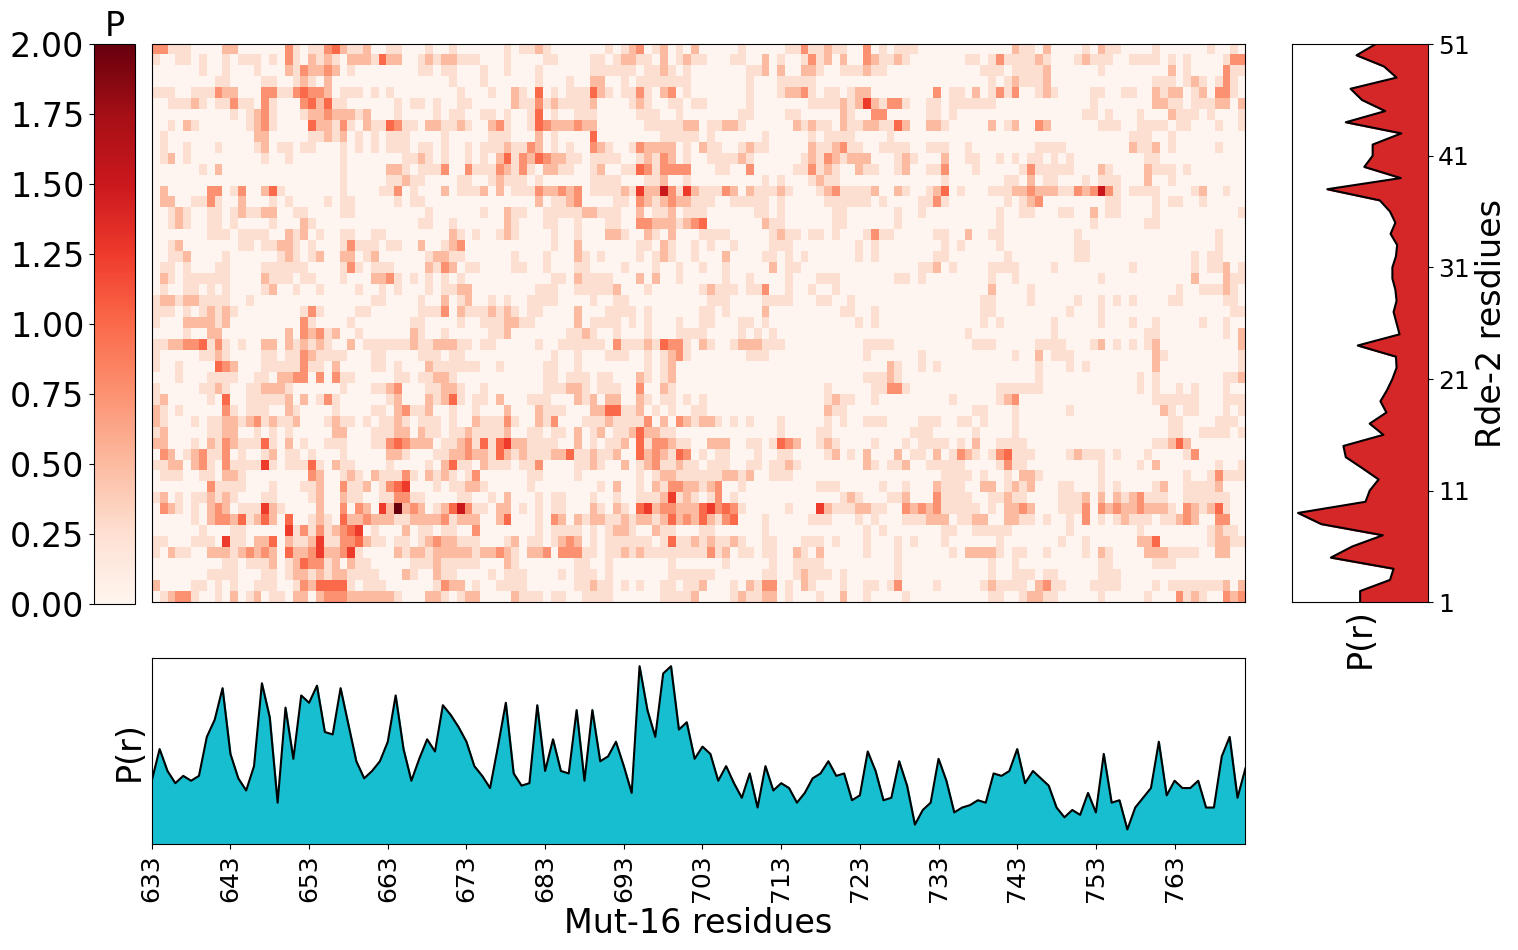

In [22]:
#for i, res_type in ["R", "K", "Y", "W"]:
    #pass

fig = plt.figure(figsize=(6*(140/51.), 51/51. * 10))
# fig = plt.figure(figsize=(5,5))
heights = [3,1]
widths = [8,1]
gspec = fig.add_gridspec(nrows=2,ncols=2,height_ratios=heights, width_ratios=widths)
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.075, 
                    hspace=0.15)

# -- Panel a --
ax = fig.add_subplot(gspec[0,0])
p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "Reds", aspect='auto')

#plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );
#plt.ylabel("Residue(r)")

#plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.040, 0.340, 0.025, 0.56])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{P}$')
cb.ax.yaxis.tick_left()
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])

#ax.xaxis.tick_top()

plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# -- Panel b --
ax = fig.add_subplot(gspec[1,0])
plt.plot(np.mean(wt_contact_av_ar.T, axis=0), color = "black")

plt.ylabel(r"P(r)")
plt.xlabel('Mut-16 residues')
plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
ax.axes.yaxis.set_ticks([])
plt.xlim(0,139.0)
plt.ylim(bottom=0)

y = np.mean(wt_contact_av_ar.T, axis=0)
x = range(len(y))

ax.fill_between(x, 0, y, color = "tab:cyan")

#for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    #ax.annotate("R", xy=((arg_res-633-0.5), 0.30+0.008), fontsize = 18)
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
#for lys_res in Lysine_residues:
    #ax.annotate("K", xy=((lys_res-633-0.5), 0.30+0.008), fontsize = 18)

# -- Panel c --
ax = fig.add_subplot(gspec[0,1])
# plt.plot(range(51),np.mean(wt_contact_av_ar.T, axis=1), color = "red")
plt.plot(-np.mean(wt_contact_av_ar.T, axis=1), range(51), color = "black")

# plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
# plt.xlabel('Residue(r)')
# # plt.xticks(np.arange(0, 50, 10), np.arange(0, 51, 10)+1 );
plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10)+1);

y = np.mean(wt_contact_av_ar.T, axis=1)
x = range(len(y))

ax.fill_betweenx(x, -y, 0, color = "tab:red")

plt.ylim(bottom=0,top=50)
plt.xlim(right=0)
ax.yaxis.tick_right()
ax.axes.xaxis.set_ticks([])
plt.xlabel("P(r)", rotation = 90)
plt.ylabel('Rde-2 resdiues')
ax.yaxis.set_label_position("right")

#for tyr_res in Tyr_residues:
     #ax.annotate("Y", xy=((tyr_res-1.5), 0.30+0.02325))
    #ax.annotate("Y", xy=(0-0.32, (tyr_res-0.5)), fontsize = 18, rotation=90)
                
fig.savefig('Combined_mut16_rde-2_plot.png',dpi=400)
fig.savefig('Combined_mut16_rde-2_plot.pdf',dpi=400)

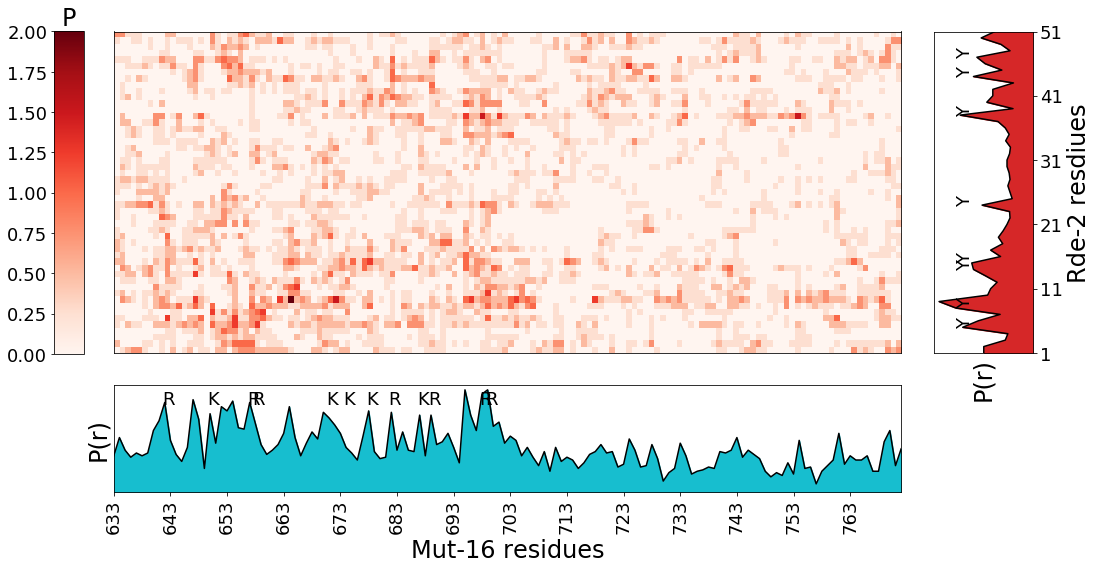

In [21]:
fig = plt.figure(figsize=(6*(140/51.), 51/51. * 8))
# fig = plt.figure(figsize=(5,5))
heights = [3,1]
widths = [8,1]
gspec = fig.add_gridspec(nrows=2,ncols=2,height_ratios=heights, width_ratios=widths)
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.075, 
                    hspace=0.15)

# -- Panel a --
ax = fig.add_subplot(gspec[0,0])
p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "Reds", aspect='auto')

#plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );
#plt.ylabel("Residue(r)")

#plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.025, 0.340, 0.025, 0.56])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{P}$')
cb.ax.yaxis.tick_left()
ax.axes.yaxis.set_ticks([])
ax.axes.xaxis.set_ticks([])

#ax.xaxis.tick_top()

plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# -- Panel b --
ax = fig.add_subplot(gspec[1,0])
plt.plot(np.mean(wt_contact_av_ar.T, axis=0), color = "black")

plt.ylabel(r"P(r)")
plt.xlabel('Mut-16 residues')
plt.xticks(np.arange(0, 140+10, 10), np.arange(1, 140+10, 10) + 632, rotation=90);
ax.axes.yaxis.set_ticks([])
plt.xlim(0,139.0)
plt.ylim(bottom=0)

y = np.mean(wt_contact_av_ar.T, axis=0)
x = range(len(y))

ax.fill_between(x, 0, y, color = "tab:cyan")

for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    ax.annotate("R", xy=((arg_res-633-0.5), 0.30+0.008), fontsize = 18)
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
for lys_res in Lysine_residues:
    ax.annotate("K", xy=((lys_res-633-0.5), 0.30+0.008), fontsize = 18)

# -- Panel c --
ax = fig.add_subplot(gspec[0,1])
# plt.plot(range(51),np.mean(wt_contact_av_ar.T, axis=1), color = "red")
plt.plot(-np.mean(wt_contact_av_ar.T, axis=1), range(51), color = "black")

# plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
# plt.xlabel('Residue(r)')
# # plt.xticks(np.arange(0, 50, 10), np.arange(0, 51, 10)+1 );
plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10)+1);

y = np.mean(wt_contact_av_ar.T, axis=1)
x = range(len(y))

ax.fill_betweenx(x, -y, 0, color = "tab:red")

plt.ylim(bottom=0,top=50)
plt.xlim(right=0)
ax.yaxis.tick_right()
ax.axes.xaxis.set_ticks([])
plt.xlabel("P(r)", rotation = 90)
plt.ylabel('Rde-2 resdiues')
ax.yaxis.set_label_position("right")

for tyr_res in Tyr_residues:
     #ax.annotate("Y", xy=((tyr_res-1.5), 0.30+0.02325))
    ax.annotate("Y", xy=(0-0.32, (tyr_res-0.5)), fontsize = 18, rotation=90)
                
#fig.savefig('Combined_mut16_rde-2_plot.png',dpi=600)
#fig.savefig('Combined_mut16_rde-2_plot.pdf',dpi=600)

(0, 1)

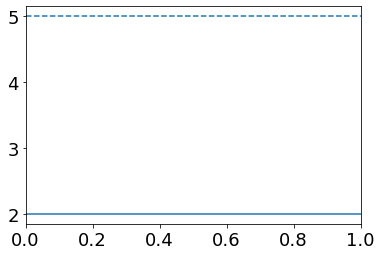

In [22]:
plt.subplots()

plt.axhline(5, linestyle="--")
plt.axhline(2)
#plt.axvline(5)

plt.xlim(0,1)

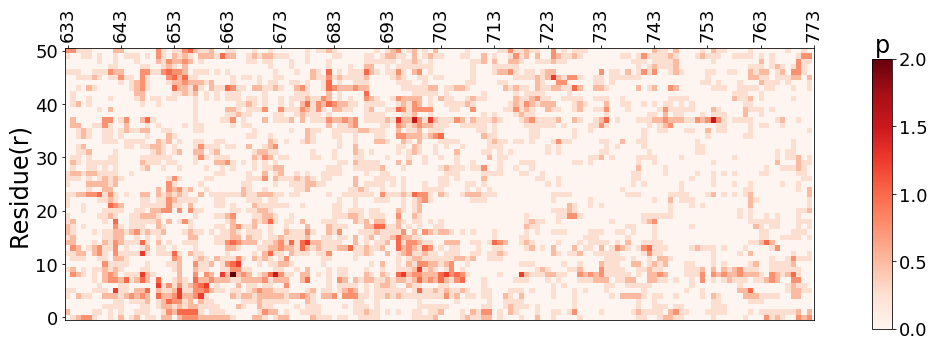

In [23]:
fig, ax = plt.subplots(figsize=(5*(140/51.), 51/51. * 5))

p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "Reds")

plt.yticks(np.arange(0, 51, 10), np.arange(0, 51, 10) );
plt.ylabel("Residue(r)")

plt.xticks(np.arange(0, 140+10, 10), np.arange(0, 140+10, 10) + 633, rotation=90);

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.90, 0.1, 0.02, 0.75])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')


ax.xaxis.tick_top()

plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

#for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    #ax.annotate("R", xy=((arg_res-633-1), 50+0.5))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
#for lys_res in Lysine_residues:
    #ax.annotate("K", xy=((lys_res-633-1), 50+0.5))
    
#for tyr_res in Tyr_residues:
    #ax.annotate("Y", xy=(140-0.5, (tyr_res)), rotation=-90)
    
#ax.annotate("F", xy=((Phe_residues-1.25), 140+0.02325))

fig.savefig('all_contacts_mut16-rde2.png',dpi=400)
fig.savefig('al_contacts_mut16-rde2.pdf',dpi=400)

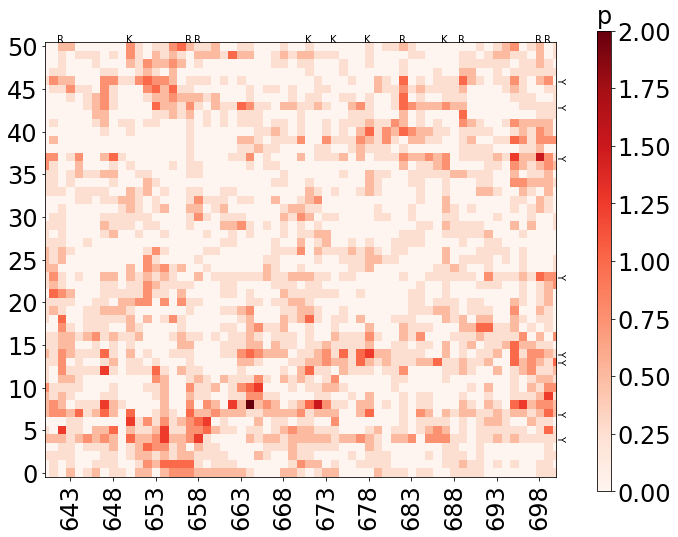

In [24]:
fig, ax = plt.subplots(figsize=(8*(60/51.), 51/51. * 8))

p = ax.imshow(wt_contact_av_ar.T, origin='lower', cmap = "Reds")

plt.yticks(np.arange(0, 51, 5), np.arange(0, 51, 5) );

plt.xticks(np.arange(0, 140+5, 5), np.arange(0, 140+5, 5) + 633, rotation=90);

plt.xlim(7,67)

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.90, 0.1, 0.02, 0.8])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')

for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    ax.annotate("R", xy=((arg_res-633-0.5), 50+0.5))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
for lys_res in Lysine_residues:
    ax.annotate("K", xy=((lys_res-633-0.5), 50+0.5))
    
for tyr_res in Tyr_residues:
    ax.annotate("Y", xy=(67-0.1, (tyr_res-1)), rotation=-90)
    
#ax.annotate("F", xy=((Phe_residues-1.25), 140+0.02325))

fig.savefig('all_contacts_mut16-rde2.png',dpi=400)
fig.savefig('al_contacts_mut16-rde2.pdf',dpi=400)

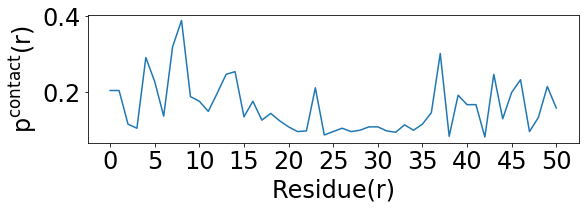

In [25]:
fig, ax = plt.subplots(figsize=(3*(140/51.), 51/51. * 3))

plt.plot(np.mean(wt_contact_av_ar.T, axis=1))

plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
plt.xlabel('Residue(r)')
plt.xticks(np.arange(0, 51, 5), np.arange(0, 51, 5) );
fig.tight_layout()
fig.savefig('sum_any-contact-residues_contacts_rde2.pdf',dpi=400)

In [26]:
max_val = np.mean(wt_contact_av_ar.T, axis=1).max()
print (max_val)

0.3892857142857143


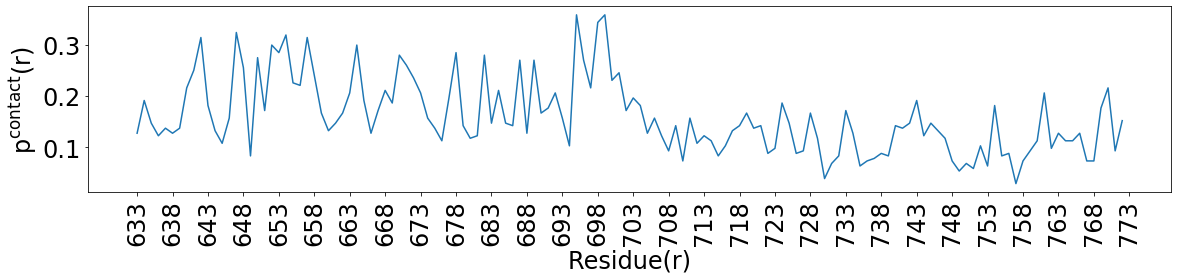

In [27]:
fig, ax = plt.subplots(figsize=(6*(140/51.), 51/51. * 4))

plt.plot(np.mean(wt_contact_av_ar.T, axis=0))

plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
plt.xlabel('Residue(r)')
plt.xticks(np.arange(0, 140+5, 5), np.arange(0, 140+5, 5) + 633, rotation=90);
fig.tight_layout()
fig.savefig('sum_any-contact-residues_contacts_mut16.pdf',dpi=400)

In [28]:
res_freq = np.mean(wt_contact_av_ar.T, axis=0)
np.savetxt("Residue_binding_probablity_Mut16.dat", res_freq)

In [29]:
mut16_res = u_wt.residues

print (mut16_res)

<ResidueGroup [<Residue VAL, 633>, <Residue PRO, 634>, <Residue PRO, 635>, ..., <Residue ASN, 49>, <Residue ARG, 50>, <Residue ASN, 51>]>


In [30]:
Arginine_residues = u_wt.residues.resids[:140][(u_wt.residues.resnames[:140] == 'ARG')]
Arginine_residues

Lysine_residues = u_wt.residues.resids[:140][(u_wt.residues.resnames[:140] == 'LYS')]
Lysine_residues

Histidine_residues = u_wt.residues.resids[:140][(u_wt.residues.resnames[:140] == 'HIS')]
Histidine_residues

Phe_residues = u_wt.residues.resids[:140][(u_wt.residues.resnames[:140] == 'PHE')]
Phe_residues


array([647, 664, 695])

In [31]:
Mut16_atoms = u_wt.residues.atoms[:32700]
Arginine_residues = Mut16_atoms.residues.resids[:140][(Mut16_atoms.residues.resnames[:140] == 'ARG')]
Lysine_residues = Mut16_atoms.residues.resids[:140][(Mut16_atoms.residues.resnames[:140] == 'LYS')]
Phe_residues = Mut16_atoms.residues.resids[:140][(Mut16_atoms.residues.resnames[:140] == 'PHE')]
print (Arginine_residues)

[642 657 658 682 689 698 699]


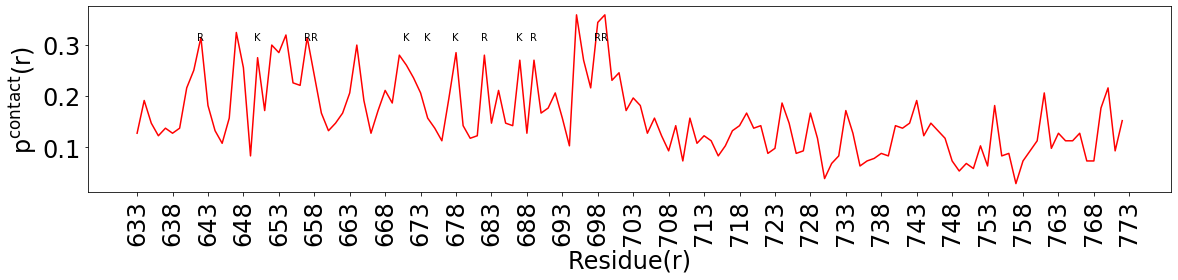

In [32]:
fig, ax = plt.subplots(figsize=(6*(140/51.), 51/51. * 4))

plt.plot(np.mean(wt_contact_av_ar.T, axis=0), color = "red")

plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
plt.xlabel('Residue(r)')
plt.xticks(np.arange(0, 140+5, 5), np.arange(0, 140+5, 5) + 633, rotation=90);

for arg_res in Arginine_residues:
    #print (pos_res)
        #ax.axvline(aromatic_residue-261-.05, lw=0.5, c="red")
    ax.annotate("R", xy=((arg_res-633-0.5), 0.30+0.008))
                #xytext=(pos_res-633-.05, 0.30+0.005), 
                #arrowprops=dict(arrowstyle='->',lw=1,fc='k', ec='k'))
        
for lys_res in Lysine_residues:
    ax.annotate("K", xy=((lys_res-633-0.5), 0.30+0.008))
    
#for his_res in Histidine_residues:
    #ax.annotate("H", xy=((his_res-633-1), 0.30+0.008))
    
#for phe_res in Phe_residues:
    #ax.annotate("F", xy=((phe_res-633-0.5), 0.30+0.008))
fig.tight_layout()
fig.savefig('sum_any-contact-residues_contacts_mut16.pdf',dpi=400)
fig.savefig('sum_any-contact-residues_contacts_mut16.png',dpi=400)

In [33]:
res_freq_rde2 = np.mean(wt_contact_av_ar.T, axis=1)
np.savetxt("Residue_binding_probablity_rde-2.dat", res_freq_rde2)

In [34]:
Rde2_atoms = u_wt.residues.atoms[32701:34020]
Tyr_residues = Rde2_atoms.residues.resids[:51][(Rde2_atoms.residues.resnames[:51] == 'TYR')]
Phe_residues = Rde2_atoms.residues.resids[:51][(Rde2_atoms.residues.resnames[:51] == 'PHE')]
print (Tyr_residues)

[ 5  8 14 15 24 38 44 47]


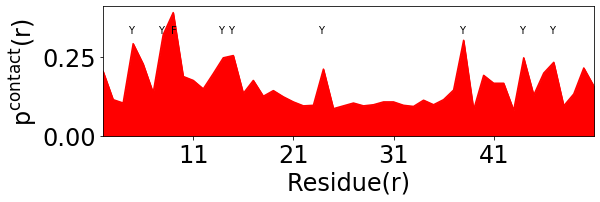

In [35]:
fig, ax = plt.subplots(figsize=(3*(140/51.), 51/51. * 3))

plt.plot(np.mean(wt_contact_av_ar.T, axis=1), color = "red")

plt.ylabel(r"$\mathrm{p^{contact}(r)}$")
plt.xlabel('Residue(r)')
plt.xticks(np.arange(0, 50, 10), np.arange(0, 51, 10)+1 );

y = np.mean(wt_contact_av_ar.T, axis=1)
x = range(len(y))

ax.fill_between(x, 0, y, color = "red")

plt.xlim(left=1,right=50)
plt.ylim(bottom=0)

for tyr_res in Tyr_residues:
    ax.annotate("Y", xy=((tyr_res-1.5), 0.30+0.02325))
    
ax.annotate("F", xy=((Phe_residues-1.25), 0.30+0.02325))
    
fig.tight_layout()
fig.savefig('sum_any-contact-residues_contacts_rde2.pdf',dpi=400)

Text(0.5, 1.0, '$\\mathrm{p}$')

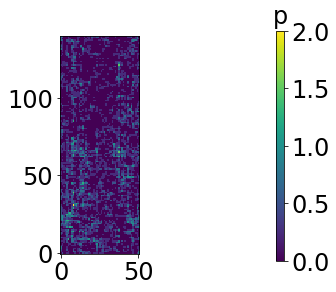

In [36]:
fig, ax = plt.subplots()

p = plt.imshow(wt_contact_av_ar, origin='lower')

divider = make_axes_locatable(ax)
plt.gcf().subplots_adjust(left  = 0.125 - 0.05, right = 0.9-0.05 )
cax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cb = plt.colorbar(p, cax=cax)
cb.ax.set_title(r'$\mathrm{p}$')